# Training Decision Tree for Binary Classifier

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

import sys
import sklearn

In [23]:
from sklearn import tree

In [24]:
X = [[0,0], [1,2]]
y = [0, 1]


In [25]:
clf = tree.DecisionTreeClassifier()

In [26]:
clf = clf.fit(X,y)


In [27]:
clf.predict([[2. ,2.]])

array([1])

In [28]:
clf.predict([[0.4, 1.2]])

array([1])

In [29]:
clf.predict_proba([[0, 0.2]])

array([[1., 0.]])

In [30]:
clf.predict_proba([[0.4, 1.2]])

array([[0., 1.]])

In [12]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

# Applying to Iris Dataset

In [31]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [32]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [33]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
X = iris.data[:, 2:]

In [35]:
y = iris.target

In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [38]:
clf = clf.fit(X, y)

# Export graphviz

- Need to install graphviz first 
 (if using command line)
 conda install graphviz python-graphviz

In [46]:
from sklearn.tree import export_graphviz

In [47]:
export_graphviz(clf,
               out_file='tree.dot',
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

# Graphviz

In [42]:
import graphviz 

In [43]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=iris.feature_names[2:],
                               class_names=iris.target_names,
                               rounded=True,
                               filled=True)

In [44]:
graph = graphviz.Source(dot_data)

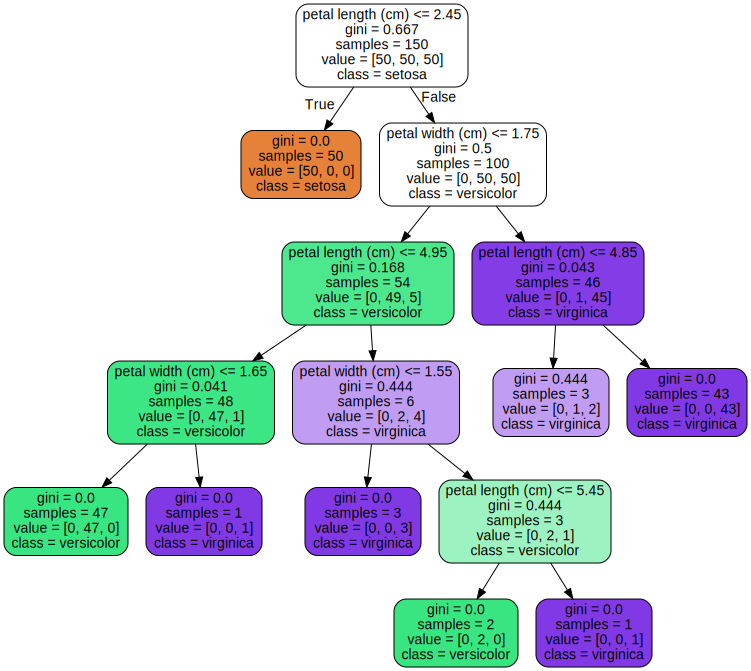

In [45]:
graph

# Data Visualisation Using Decision Tree

In [66]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [68]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [69]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [70]:
species_to_num = {'setosa': 0,
                 'versicolor': 1,
                 'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [71]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [72]:
clf.predict([[6, 2]])

array([2])

In [73]:
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy =np.meshgrid(np.arange(x_min, x_max, h),
                   np.arange(y_min, y_max, h))

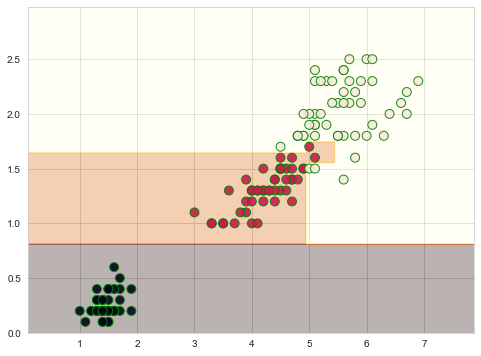

In [75]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
           alpha=0.9, edgecolors='g')

# Decision Tree Algorithms

- ID3 (Iterative Dichotomiser 3)
- C4.5 (successor of ID3)
- CART (Classification and Regression Tree)
- CHIAD (Chi-squared Automatic Interaction Detector)

# Gini Impurity

- Gini impurity is a measure of misclassification, which applies in a multiclass classifier content.
- Gini coefficient applies to binary classification and requires a classifier that can in someway rank examples according to the likelihood of being in a positive class.
- Both can be applied in some cases, but they are measure for different things. Impurity is what is commonly used in decision trees.

- Key points:

 A pure node (homogeneous contents or samples with the same class) will hae a Gini coefficient of Zero
 As the variation increases (hetrogeneous classes or increases diversity), gini coeffient increases and reaches 1.

   Gini = 1 - $\sum\limits_{j=1}^{r} {pj^{2}}$

# Which one to use Gini/Entropy

In [77]:
def gini(p):
    return (p)*(1-(p))+ (1-p)*(1-(1-p))

def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

def error(p):
    return 1 - np.max([p, 1-p])

In [78]:
x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]

sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

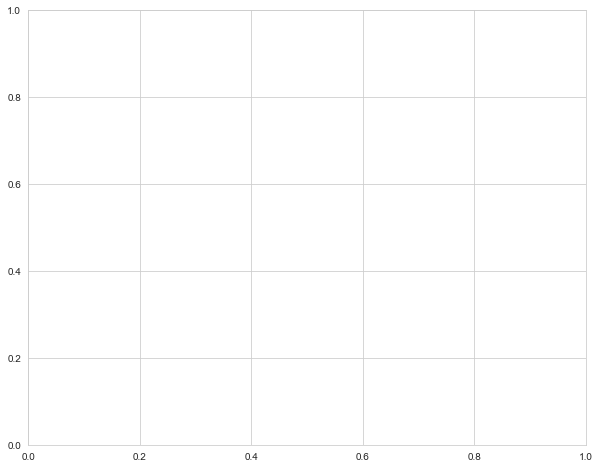

In [79]:
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
for i, lab, ls, c in zip ([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)',
                         'Gini Impurity', 'Misclassification '],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green',
                         'cyan']):
    line = ax.plot(x, i, label=lab,
                  linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbo)